In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 평균제곱오차 만드는 함수
def cost(x, y, w):
    # 데이터 x, 실제값 y, 가중치 w
    c = 0
    for i in range(len(x)):

        # 예측값 (hypothesis)
        # w는 가중치 (weight)
        hx = w * x[i]

        # 오차^2 (오차의 제곱)
        loss = (hx - y[i])**2

        c+= loss

    # mse (오차의 제곱을 평균한 것)
    return c / len(x)


In [3]:
x = [1, 2, 3]
y = [1, 2, 3]

In [4]:
print(f"w:-1 / cost : {cost(x, y, -1)}")
print(f"w:0 / cost : {cost(x, y, 0)}")
print(f"w:1 / cost : {cost(x, y, 1)}")
print(f"w:2 / cost : {cost(x, y, 2)}")
print(f"w:3 / cost : {cost(x, y, 3)}")

# w가 1일 때 cost가 0이 됨


w:-1 / cost : 18.666666666666668
w:0 / cost : 4.666666666666667
w:1 / cost : 0.0
w:2 / cost : 4.666666666666667
w:3 / cost : 18.666666666666668


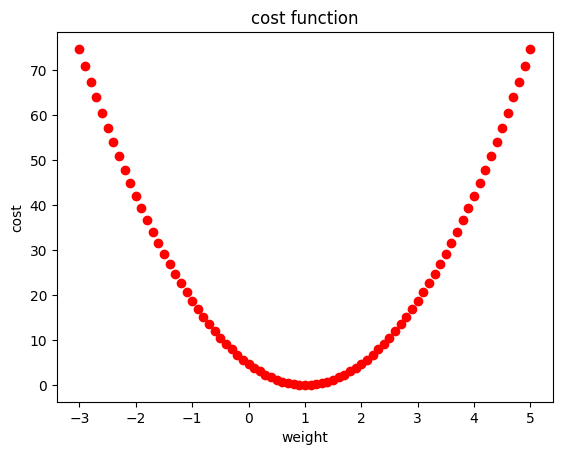

In [5]:
# 가중치와 MSE 간의 관계를 시각화하는 그래프
for i in range(-30, 51):
    w = i / 10
    c = cost(x, y, w)
    plt.plot(w, c, "ro")

plt.title("cost function")
plt.xlabel("weight")
plt.ylabel("cost")
plt.show()

In [6]:
# 경사하강법을 통해서 cost가 0인 값을 찾을 것
# 이 아래 부분은 기울기를 구하는 방법 (미분한 결과가 기울기)

def gradient_descent (x, y, w):
    c= 0
    for i in range(len(x)):
        hx = w * x[i]

        # loss = 오차 (예측값 - 실제값)
        # w가 변할 때 오차를 보고 싶다
        loss = 2 * x[i] * (hx - y[i])
        
        """
        cost(w) = (w * x[i] - y[i])^2 -> 미분
        cost(w) = w^2 * x[i]^2 - 2 * w * x[i] * y[i] + y[i]^2
        cost(w)'= 2 * w^2 * x[i] - 2 * w * y[i]
                = 2 * x[i] * (w * x[i] - y[i])
                = 2 * x[i] * (hx - y[i])
        """

        c += loss
    return c / len(x)
    # w 하나에 x 3개, y 3개 들어가니까 평균을 내야 함
    #기울기를 평균내서 리턴 (평균을 내지 않으면 기울기가 3개가 나옴)

In [7]:
w = 10
old = 0
for i in range(1000):

    # cost : 오차의 제곱을 평균한 것(MSE)
    c = cost(x, y, w)
    
    # gradient_descent : 오차를 가지고 기울기를 판별하는 것
    grad = gradient_descent(x, y, w)

    # 학습률 : 0.1으로 설정
    # 0.1씩 기울기가 점점 움직일텐데 더이상 움식이지 않으면 grad가 0이 됨
    # w에서 0을 빼도 w 그 자체니까 바뀌지 않음
    w -= 0.1 * grad
    print(f"[{i:03d}] cost: {c} old: {old} weight: {w}")

    # early stopping
    if c == old : # 더이상 변하지 않는다면 (학습할 필요가 없다면, 이미 찾고 싶은 값을 찾았다면)
        break

    old = c # 학습하는 부분

print(f"weight: {w} train: {i+1}회")

# cost 값이 old로 바뀌면서
# cost가 점점 줄어들고 있음 (이걸 반복함)
# 반복할 때마다 cost가 대체적으로 줄어듦 > 오차가 줄어 들고 있음
# weight 값을 점점 정답에 가깝게 찾고 있음

[000] cost: 378.0 old: 0 weight: 1.5999999999999996
[001] cost: 1.679999999999998 old: 378.0 weight: 1.04
[002] cost: 0.00746666666666668 old: 1.679999999999998 weight: 1.0026666666666666
[003] cost: 3.318518518518459e-05 old: 0.00746666666666668 weight: 1.0001777777777778
[004] cost: 1.4748971193416775e-07 old: 3.318518518518459e-05 weight: 1.000011851851852
[005] cost: 6.555098308270616e-10 old: 1.4748971193416775e-07 weight: 1.0000007901234569
[006] cost: 2.9133770265530366e-12 old: 6.555098308270616e-10 weight: 1.000000052674897
[007] cost: 1.2948342309565744e-14 old: 2.9133770265530366e-12 weight: 1.0000000035116599
[008] cost: 5.754818960200467e-17 old: 1.2948342309565744e-14 weight: 1.0000000002341107
[009] cost: 2.5576999725547133e-19 old: 5.754818960200467e-17 weight: 1.0000000000156073
[010] cost: 1.1367490743727494e-21 old: 2.5576999725547133e-19 weight: 1.0000000000010405
[011] cost: 5.0523310593998926e-24 old: 1.1367490743727494e-21 weight: 1.0000000000000693
[012] cost: 2

In [11]:
def cost(x, y, w):
    # 데이터 x, 실제값 y, 가중치 w
    c = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2
        c+= loss

    # mse (오차의 제곱을 평균한 것)
    return c / len(x)


def gradient_descent (x, y, w):
    c= 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = 2 * x[i] * (hx - y[i])
        c += loss
    return c / len(x)


def fit(x, y):
    # fit 함수 : 경사 하강법을 사용하여 가중치(w) 추정
    # 기울기를 내려가게 하는 값인 learning_rate을 0.1로 하면 값이 발산해버림
    # learning_rate : 한 번에 얼마나 "내려갈지"를 결정 (경험적으로 설정해야 함)
    learning_rate = 0.1
    w = 10
    old = 100
    for i in range(1000):
        c = cost(x, y, w)
        grad = gradient_descent(x, y, w)
        w -= learning_rate * grad
        print(f"[{i:03d}] cost: {c} old: {old} weight: {w}")

        if c >= old and abs(c - old) < 1.0e-15:
            break
        old = c
    return w


def predict(x, w):
    # x랑 w 받아서 예측한 값을 리턴함 
    # (궁극적인 목표가 x를 넣으면 y가 나와야 하니까)
    hx = w * np.array(x)
    return list(hx)

In [12]:
# train set : 학습시킬 셋

x_train = [1, 2, 3, 4, 5]
y_train = [4, 7, 10, 13, 16]

# fit() : 가중치 추정 함수
# 모델의 가중치를 'w'에 할당
w = fit(x_train, y_train)
print(f"weight : {w}")

[000] cost: 498.0 old: 100 weight: -4.800000000000001
[001] cost: 717.0400000000001 old: 498.0 weight: 12.96
[002] cost: 1032.4576000000004 old: 717.0400000000001 weight: -8.352000000000007
[003] cost: 1486.6589440000018 old: 1032.4576000000004 weight: 17.222400000000007
[004] cost: 2140.7088793600024 old: 1486.6589440000018 weight: -13.466880000000014
[005] cost: 3082.540786278405 old: 2140.7088793600024 weight: 23.360256000000017
[006] cost: 4438.778732240904 old: 3082.540786278405 weight: -20.832307200000027
[007] cost: 6391.761374426906 old: 4438.778732240904 weight: 32.19876864000004
[008] cost: 9204.056379174746 old: 6391.761374426906 weight: -31.438522368000044
[009] cost: 13253.76118601163 old: 9204.056379174746 weight: 44.92622684160006
[010] cost: 19085.33610785676 old: 13253.76118601163 weight: -46.71147220992008
[011] cost: 27482.803995313745 old: 19085.33610785676 weight: 63.253766651904094
[012] cost: 39575.157753251784 old: 27482.803995313745 weight: -68.70451998228492
[

In [10]:
# test : 이 모델이 제대로 만들어져 있는지 검증하는 셋
# 학습은 n회, 테스트(검증) 1회

x_test = [6, 7, 8, 9, 10]
y_test = [19, 22, 25, 28, 31]
y_pred = predict(x_test, w)

print(f"y_test : {y_test}")
print(f"y_pred : {y_pred}")

y_test : [19, 22, 25, 28, 31]
y_pred : [19.636363649255486, 22.9090909241314, 26.181818199007317, 29.454545473883233, 32.72727274875915]


In [14]:
class MyLinearRegression:
    def __init__ (self, weight=10, learning_rate=0.01):
        self.w = weight
        self.lr = learning_rate



    def cost(self, x, y):
        c = 0
        for i in range(len(x)):
            hx = self.w * x[i]
            loss = (hx - y[i])**2
            c += loss

        return c / len(x)


    def gradient_descent(self, x, y):
        c= 0
        for i in range(len(x)):
            hx = self.w * x[i]
            loss = 2 * x[i] * (hx - y[i])
            c += loss
        return c / len(x)


    def fit(self, x, y):
        old = 100
        for i in range(1000):
            c = self.cost(x, y)
            grad = self.gradient_descent(x, y)
            self.w -= self.lr * grad
            print(f"[{i:03d}] cost: {c} old: {old} weight: {self.w}")

            # 이 부분 복습할 때 찾아보기
            if c >= old and abs(c - old) < 1.0e-15:
                break
            old = c


    def predict(self, x):
        hx = self.w * np.array(x)
        return list(hx)
            

In [15]:
x_train = [1, 2, 3, 4, 5]
y_train = [2, 4, 6, 8, 10]

In [16]:
x_test = [10, 20, 30]
y_test = [20, 40, 60]

In [27]:
model = MyLinearRegression(learning_rate=0.01, weight=1)
# weight를 지정하지 않으면 기본값이 10이지만 바꿀 수 있음
# learning_rate도 바꿀 수 있음 > 바꾸면 학습에 걸리는 시간이 달라짐

model.fit(x_train, y_train)

[000] cost: 11.0 old: 100 weight: 1.22
[001] cost: 6.692400000000001 old: 11.0 weight: 1.3916
[002] cost: 4.071656160000001 old: 6.692400000000001 weight: 1.525448
[003] cost: 2.477195607744001 old: 4.071656160000001 weight: 1.6298494399999999
[004] cost: 1.5071258077514507 old: 2.477195607744001 weight: 1.7112825632
[005] cost: 0.9169353414359822 old: 1.5071258077514507 weight: 1.774800399296
[006] cost: 0.5578634617296512 old: 0.9169353414359822 weight: 1.82434431145088
[007] cost: 0.33940413011632015 old: 0.5578634617296512 weight: 1.8629885629316862
[008] cost: 0.20649347276276947 old: 0.33940413011632015 weight: 1.8931310790867153
[009] cost: 0.1256306288288691 old: 0.20649347276276947 weight: 1.9166422416876379
[010] cost: 0.07643367457948394 old: 0.1256306288288691 weight: 1.9349809485163576
[011] cost: 0.046502247614157964 old: 0.07643367457948394 weight: 1.9492851398427589
[012] cost: 0.028291967448453754 old: 0.046502247614157964 weight: 1.960442409077352
[013] cost: 0.017212

In [29]:
model.w

1.9999999999999996

In [30]:
# 한번 y 값을 예측해보자
y_pred = model.predict(x_test)
print(y_test)
print(y_pred)


[20, 40, 60]
[19.999999999999996, 39.99999999999999, 59.999999999999986]
